# Reti neurali artificiali
In questo notebook implementeremo la nostra prima rete neurale artificiale utilizzando Keras, lo scopo del nostro modello sarà sempre quello di identificare tumori al seno maligni, a questo scopo utilizzeremo il **Winsconsis Breast Cancer Dataset**.
<br><br>
Importiamo i vari moduli.

In [32]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import RandomUniform

Carichiamo il Winsconsis breast cancer dataset all'interno di un DataFrame.

In [33]:
breast_cancer = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data",
                           names=["id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"])

breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Creiamo gli array numpy per addestrare e testare la nostra rete neurale.

In [34]:
X = breast_cancer.drop(['diagnosis','id'],axis=1).values
Y = breast_cancer['diagnosis'].values

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

Codifichiamo i label della nostra variabile target in numeri.

Ciò viene fatto siccome il target è codificato in "yes" e "no", usando il label encoder possiamo agilmente convertirli in numeri.

In [35]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

Standardizziamo gli array con le features.

In [36]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [37]:
X_train.shape

(398, 30)

Adesso possiamo passare alla costruzione della nostra rete neurale artificiale, il primo modello che andremo a creare sarà così composto:
* **30 nodi** nello strato di input, pari al numero di features del dataset.
* **12 nodi** nello strato nascosto, numero scelto arbitrariamente da noi. 
* **1 nodo** nello strato di output, dato che si tratta di una classificazione binaria.

La funzione di attivazione che utilizzeremo per lo strato nascosto è la **ReLU**, mentre, trattandosi di un problema di classificazione binaria, per lo strato di output utilizzeremo la sigmoide. [Qui](https://keras.io/activations/) puoi vedere l'elenco completo delle **funzioni di attivazione di base** disponibili con Keras.

In [38]:
# sequential crea un modello inzialmente vuoto senza alcun layer e alcun nodo
model = Sequential()

# aggiungiamo un unico hidden layer con 12 nodi e una funzione di attivazione relu
model.add(Dense(12, input_dim=X_train.shape[1], activation="relu"))

# aggiungiamo un layer di output con un solo nodo e una funzione di attivazione sigmoid. 
# in questo caso non dobbiamo specificare la dimensione dell'input perchè sarà il modello
# stesso a capire che l'input è quello del layer precedente
model.add(Dense(1, activation="sigmoid"))

Utilizziamo il metodo compile per configurare la fase di addestramento, specificando come funzione di ottimizzazione lo **Stochastic Gradient Descent** (parleremo nel dettaglio di questo algoritmo nella sezione apposita), come funzione da minimizzare la **binary cross entropy** e aggiungiamo come metrica aggiuntiva da visualizzare durante l'addestramento l'**accuracy**.

In [39]:
# viene usata la binary_crossentropy perchè siamo in un problema di classificazione binaria
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

Utilizziamo il metodo summary per osservare il numero di parametri totali che la nostra rete dovrà ottimizzare.

In [40]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 12)                372       
                                                                 
 dense_13 (Dense)            (None, 1)                 13        
                                                                 
Total params: 385 (1.50 KB)
Trainable params: 385 (1.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Abbiamo 385 parametri in totale:
* 1 - Un peso per ogni connessione dai 30 nodi di input ai 12 nodi dello strato nascosto (30x12=260), più un bias per ogni nodo nello strato nascosto (12).
* 2 - Un peso per ogni connessione dello strato nascosto all'unico nodo dello strato di output (12), più un bias (1)

Facciamo partire l'addestramento.

In [41]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100


13/13 [==============================] - 1s 2ms/step - loss: 0.7054 - accuracy: 0.5779
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5795 - accuracy: 0.7236
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4943 - accuracy: 0.7940
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4344 - accuracy: 0.8442
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3868 - accuracy: 0.8844
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3496 - accuracy: 0.9045
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3193 - accuracy: 0.9196
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2944 - accuracy: 0.9271
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2738 - accuracy: 0.9271
Epoch 10/100
13/13 [==============================] - 0s 4ms/step - loss: 0.2566 - accuracy: 0.9296
Epoch 11/100
13/13 [=

All'epoca 100 il nostro modello ha ottenuto sul set di addestramento un'accuracy del 98% e un valore per la funzione di costo di 0.082, verifichiamo il risultato anche sul set di test.

In [42]:
# Un valore della funzione di costo (loss) basso indica che il modello ha poca incertezza,
# perchè tiene conto della probabilità di quanto la previsione sia corretta.
loss, acc = model.evaluate(X_test, y_test)
print("Loss sul test set: %.4f" % loss)
print("Accuracy sul test set: %.4f" % acc)

6/6 [==============================] - 0s 2ms/step - loss: 0.0856 - accuracy: 0.9708
Loss sul test set: 0.0856
Accuracy sul test set: 0.9708


Confrontando il risultato con quanto fatto in [questo precedente notebook](https://github.com/ProfAI/dl00/blob/master/3%20-%20Machine%20Learning%20in%20breve/Regressione%20logistica%20con%20Keras.ipynb), possiamo osservare come una rete neurale artificiale abbia portanto un risultato migliore rispetto a una semplice regressione logistica, specialmente per quanto riguarda l'incertezza dell'errore.

## Reti neurali artificiali profonde
Adesso proviamo a costruire una rete neurale artificiale profonda, cioè una rete neurale che ha più di uno strato nascosto, nello specifica la nostra rete neurale profonda sarà così composta:
* **30 nodi** nello strato di input
* **12 nodi** nel primo strato nascosto
* **8 nodi** nel secondo strato nascosto
* **4 nodi** nel secondo strato nascosto
* **1 nodo** nello strato di input

Come funzione di attivazione utilizzeremo sempre la ReLU per gli strati nascosti e la sigmoide per lo strato di output.

In [43]:
model = Sequential()

model.add(Dense(12, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

Utilizziamo il metodo summary per osservare quanti parametri dovrà ottimizzare il nostro modello questa volta.

In [44]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 12)                372       
                                                                 
 dense_15 (Dense)            (None, 8)                 104       
                                                                 
 dense_16 (Dense)            (None, 4)                 36        
                                                                 
 dense_17 (Dense)            (None, 1)                 5         
                                                                 
Total params: 517 (2.02 KB)
Trainable params: 517 (2.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Adesso son ben 517, facciamo partire l'addestramento.

In [45]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 1s 2ms/step - loss: 0.7072 - accuracy: 0.4347
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5000
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.5754
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6676 - accuracy: 0.6457
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6557 - accuracy: 0.7035
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6437 - accuracy: 0.7538
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6313 - accuracy: 0.7889
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6178 - accuracy: 0.8065
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6033 - accuracy: 0.8191
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5884 - accuracy: 0.8367
Epoch 11/

All'epoca 100 il nostro modello ha ottenuto sul set di addestramento un'accuracy del 98.2% e un valore per la funzione di costo di 0.058, verifichiamo il risultato anche sul set di test.

In [46]:
loss, acc = model.evaluate(X_test, y_test)
print("Loss sul test set: %.4f" % loss)
print("Accuracy sul test set: %.4f" % acc)

6/6 [==============================] - 0s 6ms/step - loss: 0.0651 - accuracy: 0.9766
Loss sul test set: 0.0651
Accuracy sul test set: 0.9766


Aggiungendo due nuovi strati le performance della nostra rete sono migliorate.

## Leaky ReLU
Reimplentiamo lo stesso modello, questa volta utilizzando la Leaky ReLU come funzione di attivazione per gli strati nascosti. La Leaky ReLU fa parte delle **funzioni di attivazioni avanzate** di Keras, che puoi trovare [qui](https://keras.io/layers/advanced-activations/).
<br>
Queste funzioni di attivazioni vanno aggiunte a un modello come fossero degli strati e non passate come parametro della classe Dense, come invece fatto finora.

In [47]:
from keras.layers import LeakyReLU

model = Sequential()

model.add(Dense(12, input_dim=X_train.shape[1]))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(4))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 1s 2ms/step - loss: 0.7061 - accuracy: 0.6407
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.6784
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4878 - accuracy: 0.7312
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4446 - accuracy: 0.7487
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4141 - accuracy: 0.7739
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3901 - accuracy: 0.8065
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3696 - accuracy: 0.8216
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3520 - accuracy: 0.8543
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3373 - accuracy: 0.8618
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3239 - accuracy: 0.8744
Epoch 11/

In [48]:
loss, acc = model.evaluate(X_test, y_test)
print("Loss sul test set: %.4f" % loss)
print("Accuracy sul test set: %.4f" % acc)

6/6 [==============================] - 0s 2ms/step - loss: 0.1177 - accuracy: 0.9532
Loss sul test set: 0.1177
Accuracy sul test set: 0.9532


L'utilizzo della funzione Leaky ReLU ci ha permesso di ottenere un modello ancora migliore.

### Matrice di confusione
Nonostante le metriche della nostra rete neurale artificiale siano molto buone, dobbiamo tener conto di un ulteriore fattore. Quando si tratta di riconoscere un tumore, sbagliare nel diagnosticare un tumore maligno come benigno è molto più grave del classificare un tuomore benigno come maligno, infatti in quest'ultimo caso l'errore potrebbe venir fuori dopo ulteriori indagini mediche, mentre nel primo il paziente potrebbe non ricevere cure mediche necessarie per lui a causa dell'errore.
<br><br>
Questo problema è comune in molti problemi di classificazione, per affronterlo ci viene in contro una nuova metrica: la matrice di confusione.
<br>
La matrice di confusione ci permette di comprendere dove il nostro modello ha commesso degli errori.
<br><br>
Creiamo una matrice di confusione utilizzando la funzione <span style="font-family: Monaco">plot_confusion_matrix</span> disponibile all'interno del modulo <span style="font-family: Monaco">viz</span>.



6/6 [==============================] - 0s 1ms/step


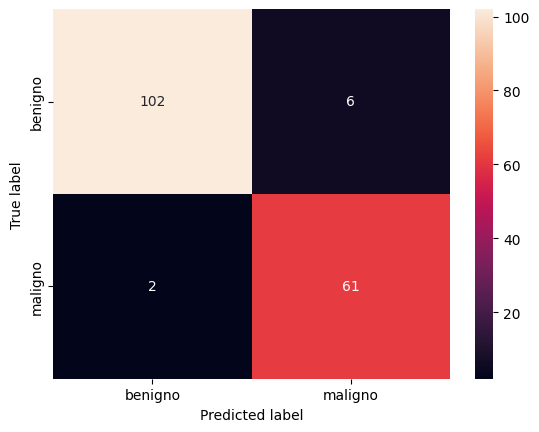

In [57]:
#crea la matrice di confusione con le label benigno e maligno
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_prob = model.predict(X_test)

# Trasforma le probabilità in classi
y_pred = [1 if prob >= 0.5 else 0 for prob in y_pred_prob]

cm = confusion_matrix(y_test, y_pred)
class_labels = ["benigno", "maligno"]

# Mostra la matrice di confusione con le etichette personalizzate
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


Osservando la matrice di confusione possiamo vedere che:
1. La rete ha correttamente classificato 108 tumori benigni su 108.
2. La rete ha correttamente classificato 61 tumori maligni su 63
3. La rete ha confuso 2 tumori maligni come tumori benigni.

Come vedi, in questo caso, due paziente potrebbero non aver ricevuto le cure per la loro condizione medica.